In [14]:
using Distributions
using Gadfly
using TimerOutputs

# ARMA(p,4) with $p<4$ (for simplicity)

$y_t = \lambda f_t + e_t$

$e_t = \psi_1 e_{t-1} + \dots + \psi_p e_{t-p} + \frac{1}{3} w_t + \frac{2}{3} w_{t-1} + w_{t-2} + \frac{2}{3} w_{t-3} + \frac{1}{3} w_{t-4}$

In [18]:
ψ = [0.85, 0.05]
p = length(ψ)
θ = [1, 2, 3, 2, 1]./3   # = f
σ2 = 1.

G = hcat([ψ; zeros(5-p,1)],[eye(4); zeros(1,4)])
Ω_vec = σ2*(eye(5*5)-kron(G,G))\vec(θ*θ')
Ω = reshape(Ω_vec, 5, 5)

5×5 Array{Float64,2}:
 39.6754    5.08362   1.57472   0.538889  0.111111
  5.08362   2.25666   1.5825    0.783333  0.222222
  1.57472   1.5825    1.55556   0.888889  0.333333
  0.538889  0.783333  0.888889  0.555556  0.222222
  0.111111  0.222222  0.333333  0.222222  0.111111

In [30]:
T = 
α = zeros(T, 5)
α0 = chol(Hermitian(Ω))*randn(5)

5-element Array{Float64,1}:
 -7.91418  
  0.302698 
  0.489199 
  0.0402308
  0.186072 

### does not work with missing observations ! ! !

# AR(1) process

In [36]:
function ARp(ψ, σ2η, T, Tburn)
    p = length(ψ)
    ση = sqrt(σ2η)
    x = zeros(T+Tburn)
    for t=p+1:T+Tburn
        x[t] = ψ'*x[t-1:-1:t-p] + ση*randn()
    end
    return x[Tburn+1:Tburn+T]
end

ARp (generic function with 1 method)

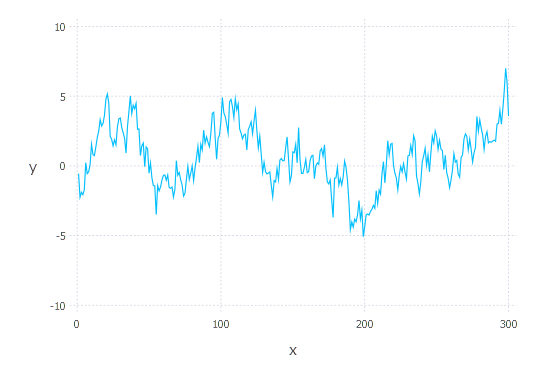

In [37]:
T = 300

λ   = 1.
ψ   = [0.9]
σ2η = 1.
p = length(ψ)

f = ARp([0.85, 0.05], 1., T, 10^3)
ξ = ARp(ψ, σ2η, T, 10^3)

y = λ*f + ξ

plot(
    layer(x=1:T, y=y-f, Geom.line)
    )

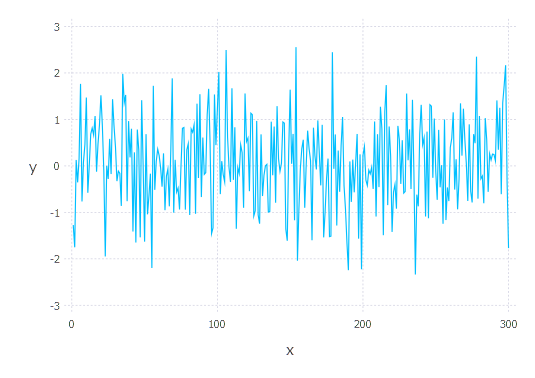

In [40]:
y_transf    = zeros(T)
f_transf    = zeros(T)

# TODO: only for p=1 here
y_transf[1] = 1/sqrt(1-ψ[1]^2)*y[1]
f_transf[1] = 1/sqrt(1-ψ[1]^2)*f[1]

y_transf[p+1:T] = y[p+1:T] - ψ[1]*y[1:T-p]
f_transf[p+1:T] = f[p+1:T] - ψ[1]*f[1:T-p]

plot(
    layer(x=1:T, y=y_transf-f_transf, Geom.line)
    )

In [ ]:
for s=1:S
    
    Jλ = 
    hλ = 
    rand(Normal())
    
    
end